# Coursework1: Convolutional Neural Networks 

## instructions

Please submit a version of this notebook containing your answers **together with your trained model** on CATe as CW2.zip. Write your answers in the cells below each question.

### Setting up working environment 

For this coursework you will need to train a large network, therefore we recommend you work with Google Colaboratory, which provides free GPU time. You will need a Google account to do so. 

Please log in to your account and go to the following page: https://colab.research.google.com. Then upload this notebook.

For GPU support, go to "Edit" -> "Notebook Settings", and select "Hardware accelerator" as "GPU".

You will need to install pytorch by running the following cell:

In [0]:
!pip install torch torchvision

In [0]:
!pip install scikit-learn

## Introduction

For this coursework you will implement one of the most commonly used model for image recognition tasks, the Residual Network. The architecture is introduced in 2015 by Kaiming He, et al. in the paper ["Deep residual learning for image recognition"](https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/He_Deep_Residual_Learning_CVPR_2016_paper.pdf). 
<br>

In a residual network, each block contains some convolutional layers, plus "skip" connections, which allow the activations to by pass a layer, and then be summed up with the activations of the skipped layer. The image below illustrates a building block in residual networks.

![resnet-block](utils/resnet-block.png)

Depending on the number of building blocks, resnets can have different architectures, for example ResNet-50, ResNet-101 and etc. Here you are required to build ResNet-18 to perform classification on the CIFAR-10 dataset, therefore your network will have the following architecture:

![resnet](utils/resnet.png)

## Part 1 (40 points)

In this part, you will use basic pytorch operations to define the 2D convolution, max pooling operation, linear layer as well as 2d batch normalization. 

### YOUR TASK

- implement the forward pass for Conv2D, MaxPool2D, Linear and BatchNorm2d
- You are **NOT** allowed to use the torch.nn modules

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [0]:
class Conv2d(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0, bias=True):

        super(Conv2d, self).__init__()
        """
        An implementation of a convolutional layer.

        The input consists of N data points, each with C channels, height H and
        width W. We convolve each input with F different filters, where each filter
        spans all C channels and has height HH and width WW.

        Parameters:
        - w: Filter weights of shape (F, C, HH, WW)
        - b: Biases, of shape (F,)
        - kernel_size: Size of the convolving kernel
        - stride: The number of pixels between adjacent receptive fields in the
            horizontal and vertical directions.
        - padding: The number of pixels that will be used to zero-pad the input.
        """

        ########################################################################
        # TODO: Define the parameters used in the forward pass                 #
        ########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        self.in_c = in_channels
        self.out_c = out_channels

        
        self.stride = (stride, stride) if type(stride) == int else stride
        self.padding = (padding, padding) if type(padding) == int else padding 
        self.kernel_size = (kernel_size, kernel_size) if type(kernel_size) == int else kernel_size

        self.kernel = nn.init.xavier_normal_(
            torch.empty(self.out_c, self.in_c, self.kernel_size[0], self.kernel_size[1])
        )

        self.bias = bias

        if self.bias:
            self.b = nn.init.xavier_normal_(torch.empty((self.out_c, 1)))
        pass

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data, of shape (N, F, H', W').
        """

        ########################################################################
        # TODO: Implement the forward pass                                     #
        ########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        x_unf = F.unfold(x, self.kernel_size, stride=self.stride, padding=self.padding)
        output_unf = x_unf.transpose(1, 2).matmul(self.kernel.view(self.kernel.size(0), -1).t()).transpose(1, 2)

        output_unf = output_unf + self.b if self.bias else output_unf

        out = F.fold(
            output_unf,
            (
                int((x.size(2) - self.kernel_size[0] + 2 * self.padding[0]) / self.stride[0]) + 1,
                int((x.size(3) - self.kernel_size[1] + 2 * self.padding[1]) / self.stride[1]) + 1,
            ),
            (1, 1),
        )

        diff = (
            (
                (
                    torch.nn.functional.conv2d(x, self.kernel, self.b.t()[0], stride=self.stride, padding=self.padding)
                    - out
                )
                .abs()
                .max()
            )
            if self.bias
            else (
                (torch.nn.functional.conv2d(x, self.kernel, stride=self.stride, padding=self.padding) - out).abs().max()
            )
        )
        print((f"difference is : {diff}"))

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################

        return out

conv2d = Conv2d(3,4,3,stride = (4,2), padding=(2,3), bias=False)
exple = torch.randn(1, 3, 5, 5) # 5 image 3 channel, 6x10
conv2d.forward(exple)
print("ok")

difference is : 1.1920928955078125e-07
ok


In [0]:
class MaxPool2d(nn.Module):
    def __init__(self, kernel_size):
        super(MaxPool2d, self).__init__()
        """
        An implementation of a max-pooling layer.

        Parameters:
        - kernel_size: the size of the window to take a max over
        """
        ########################################################################
        # TODO: Define the parameters used in the forward pass                 #
        ########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        
        self.kernel_size = (kernel_size, kernel_size) if type(kernel_size) == int else kernel_size
        self.stride = (kernel_size, kernel_size) if type(kernel_size) == int else kernel_size

        pass

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data, of shape (N, C, H', W').
        """
        ########################################################################
        # TODO: Implement the forward pass                                     #
        ########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        print(x.size())

        # Unfold
        x_unf = F.unfold(x, self.kernel_size, stride=self.stride)

        # Defining number of stride possible
        max_num_of_k = (x.size(2)//self.kernel_size[0]) * (x.size(3)//self.kernel_size[1])

        # Getting the kernel separated by channels
        mm = x_unf.transpose(1,2)
        mm = mm.view((-1,max_num_of_k,x.size(1),self.kernel_size[0]*self.kernel_size[1]))

        # print(f"mm size : {mm.size()}")
        # Getting the maximum
        mm_max = mm.max(dim=3,keepdim=True).values
        almost = mm_max.transpose(1,3)

        # Reshape
        out = almost.view(-1,x.size(1),x.size(2)//self.kernel_size[0], x.size(3)//self.kernel_size[1])


        diff = ((F.max_pool2d(x, self.kernel_size, stride=self.stride)- out).abs().max())
        print((f"difference is : {diff}"))

        pass

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################

        return out

maxpool2d = MaxPool2d((3,8))
exple = torch.randn(18, 3, 8, 8) # 5 image 3 channel, 6x10
maxpool2d.forward(exple)
print("ok")

torch.Size([18, 3, 8, 8])
difference is : 0.0
ok


In [0]:
class Linear(nn.Module):
    def __init__(self, in_channels, out_channels, bias=True):
        super(Linear, self).__init__()
        """
        An implementation of a Linear layer.

        Parameters:
        - weight: the learnable weights of the module of shape (in_channels, out_channels).
        - bias: the learnable bias of the module of shape (out_channels).
        """
        ########################################################################
        # TODO: Define the parameters used in the forward pass                 #
        ########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        self.n_in = in_channels
        self.n_out = out_channels

        # need information of batch size in here
        self.W = nn.init.xavier_normal_(torch.empty((self.n_out, self.n_in)))

        self.bias = bias

        if self.bias:
            self.b = nn.init.uniform_(torch.empty(1))

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, *, H) where * means any number of additional
        dimensions and H = in_channels
        Output:
        - out: Output data of shape (N, *, H') where * means any number of additional
        dimensions and H' = out_channels
        """
        ########################################################################
        # TODO: Implement the forward pass                                     #
        ########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        print((F.linear(x, self.W, bias = self.b).size()))

        out = x@self.W.T + self.b if self.bias else x@self.W.T


        diff = ((F.linear(x, self.W, bias = self.b)- out).abs().max()) if self.bias else ((F.linear(x, self.W)- out).abs().max())
        print((f"difference is : {diff}"))

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################

        return out
    
lin = Linear(18,8)
exple = torch.randn(5, 18) # 5 image 3 channel, 6x10
lin.forward(exple)
print("ok")

torch.Size([5, 8])
difference is : 0.0
ok


In [0]:
class BatchNorm2d(nn.Module):
    def __init__(self, num_features, eps=1e-05, momentum=0.1):
        super(BatchNorm2d, self).__init__()
        """
        An implementation of a Batch Normalization over a mini-batch of 2D inputs.

        The mean and standard-deviation are calculated per-dimension over the
        mini-batches and gamma and beta are learnable parameter vectors of
        size num_features.

        Parameters:
        - num_features: C from an expected input of size (N, C, H, W).
        - eps: a value added to the denominator for numerical stability. Default: 1e-5
        - momentum: momentum – the value used for the running_mean and running_var
        computation. Default: 0.1
        - gamma: the learnable weights of shape (num_features).
        - beta: the learnable bias of the module of shape (num_features).
        """
        ########################################################################
        # TODO: Define the parameters used in the forward pass                 #
        ########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        self.eps = eps
        self.num_features = num_features
        self.gamma = nn.init.uniform_(torch.empty(num_features))
        self.beta = nn.init.uniform_(torch.empty(num_features))
        self.momentum = momentum
        self.running_mean = torch.empty(num_features).view(1, num_features, 1, 1)
        self.running_var = torch.ones(num_features).view(1, num_features, 1, 1)

        pass

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################

    def forward(self, x):
        """
        During training this layer keeps running estimates of its computed mean and
        variance, which are then used for normalization during evaluation.
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data of shape (N, C, H, W) (same shape as input)
        """
        ########################################################################
        # TODO: Implement the forward pass                                     #
        #       (be aware of the difference for training and testing)          #
        ########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        # Broadcasting gamma and beta
        gamma_broad = self.gamma.view(1, x.size(1), 1, 1)
        beta_broad = self.beta.view(1, x.size(1), 1, 1)

        # Checking
        tmp = F.batch_norm(
            x, self.running_mean.view(x.size(1)), self.running_var.view(x.size(1)), weight=self.gamma, bias=self.beta, training=True
        )

        # Computing mean and var
        mean = x.mean(axis=(0, 2, 3), keepdims=True)
        var = ((x - mean) ** 2).mean(axis=(0, 2, 3), keepdims=True)

        # Computing running_mean and running_var
        self.running_mean = self.momentum * self.running_mean + (1.0 - self.momentum) * mean
        self.running_var = self.momentum * self.running_var + (1.0 - self.momentum) * var

        # Batchnorm
        X_hat = (x - mean) / torch.sqrt(var + self.eps)

        # Batchnorm with learning
        out = X_hat * gamma_broad + beta_broad

        # print(self.running_mean.view(3))
        diff = (tmp - out).abs().max()
        print((f"difference is : {diff}"))

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################

        return x


batchNorm2d = BatchNorm2d(30)
exple = torch.randn(50,30,128,138)  # 5 image 3 channel, 6x10
dd = torch.nn.BatchNorm2d(3)
batchNorm2d.forward(exple)
print("ok")



difference is : 9.5367431640625e-07
ok


## Part 2

In this part, you will train a ResNet-18 defined on the CIFAR-10 dataset. Code for training and evaluation are provided. 

### Your Task

1. Train your network to achieve the best possible test set accuracy after a maximum of 10 epochs of training.

2. You can use techniques such as optimal hyper-parameter searching, data pre-processing

3. If necessary, you can also use another optimizer

4. **Answer the following question:**
Given such a network with a large number of trainable parameters, and a training set of a large number of data, what do you think is the best strategy for hyperparameter searching? 

In [0]:
import torch
from torch.nn import Conv2d, MaxPool2d
import torch.nn as nn
import torch.nn.functional as F

Next, we define ResNet-18:

In [0]:
# define resnet building blocks

class ResidualBlock(nn.Module): 
    def __init__(self, inchannel, outchannel, stride=1): 
        
        super(ResidualBlock, self).__init__() 
        
        self.left = nn.Sequential(Conv2d(inchannel, outchannel, kernel_size=3, 
                                         stride=stride, padding=1, bias=False), 
                                  nn.BatchNorm2d(outchannel), 
                                  nn.ReLU(inplace=True), 
                                  Conv2d(outchannel, outchannel, kernel_size=3, 
                                         stride=1, padding=1, bias=False), 
                                  nn.BatchNorm2d(outchannel)) 
        
        self.shortcut = nn.Sequential() 
        
        if stride != 1 or inchannel != outchannel: 
            
            self.shortcut = nn.Sequential(Conv2d(inchannel, outchannel, 
                                                 kernel_size=1, stride=stride, 
                                                 padding = 0, bias=False), 
                                          nn.BatchNorm2d(outchannel) ) 
            
    def forward(self, x): 
        
        out = self.left(x) 
        
        out += self.shortcut(x) 
        
        out = F.relu(out) 
        
        return out


    
    # define resnet

class ResNet(nn.Module):
    
    def __init__(self, ResidualBlock, num_classes = 10):
        
        super(ResNet, self).__init__()
        
        self.inchannel = 64
        self.conv1 = nn.Sequential(Conv2d(3, 64, kernel_size = 3, stride = 1,
                                            padding = 1, bias = False), 
                                  nn.BatchNorm2d(64), 
                                  nn.ReLU())
        
        self.layer1 = self.make_layer(ResidualBlock, 64, 2, stride = 1)
        self.layer2 = self.make_layer(ResidualBlock, 128, 2, stride = 2)
        self.layer3 = self.make_layer(ResidualBlock, 256, 2, stride = 2)
        self.layer4 = self.make_layer(ResidualBlock, 512, 2, stride = 2)
        self.maxpool = MaxPool2d(4)
        self.dropout = nn.Dropout()
        self.fc = nn.Linear(512, num_classes)
        
    
    def make_layer(self, block, channels, num_blocks, stride):
        
        strides = [stride] + [1] * (num_blocks - 1)
        
        layers = []
        
        for stride in strides:
            
            layers.append(block(self.inchannel, channels, stride))
            
            self.inchannel = channels
            
        return nn.Sequential(*layers)
    
    
    def forward(self, x):
        
        x = self.conv1(x)
        
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        
        x = self.maxpool(x)
        
        x = x.view(x.size(0), -1)
        # x = self.dropout(x)
        x = self.fc(x)
        
        return x
    
    
def ResNet18():
    return ResNet(ResidualBlock)

### Loading dataset
We will import images from the [torchvision.datasets](https://pytorch.org/docs/stable/torchvision/datasets.html) library <br>
First, we need to define the alterations (transforms) we want to perform to our images - given that transformations are applied when importing the data. <br>
Define the following transforms using the torchvision.datasets library -- you can read the transforms documentation [here](https://pytorch.org/docs/stable/torchvision/transforms.html): <br>
1. Convert images to tensor
2. Normalize mean and std of images with values:mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010]

In [0]:
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler

import torchvision.datasets as dset

import numpy as np

import torchvision.transforms as T

##############################################################
#                       YOUR CODE HERE                       #       
##############################################################
data_dir = 'data/CIFAR10/'
NUM_TRAIN = 49000

# Transform
std_norm = torch.tensor([0.2023, 0.1994, 0.2010])
mean_norm = torch.tensor([0.4914, 0.4822, 0.4465])
transformations = T.Compose([T.ToTensor(), T.Normalize(mean_norm, std_norm)])

# train data
train_set = dset.CIFAR10(root=data_dir, train=True, download=True, transform=transformations)

# val data
val_set = dset.CIFAR10(root=data_dir, train=True, download=True, transform=transformations)

# test data
test_set = dset.CIFAR10(root=data_dir, train=False, download=True, transform=transformations)


##############################################################
#                       END OF YOUR CODE                     #
##############################################################


  0%|          | 0/170498071 [00:00<?, ?it/s]

170500096it [00:01, 89877571.75it/s]                               


Extracting data/CIFAR10/cifar-10-python.tar.gz to data/CIFAR10/
Files already downloaded and verified
Files already downloaded and verified


Now load the dataset using the transform you defined above, with batch_size = 64<br>
You can check the documentation [here](https://pytorch.org/docs/stable/torchvision/datasets.html)
Then create data loaders (using DataLoader from torch.utils.data) for the training and test set

In [0]:

##############################################################
#                       YOUR CODE HERE                       #       
##############################################################

data_dir = './data'


loader_train = DataLoader(train_set, batch_size=64, sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))
loader_val = DataLoader(val_set, batch_size=64, sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN,50000)))
loader_test = DataLoader(test_set, batch_size=64)

##############################################################
#                       END OF YOUR CODE                     #       
##############################################################



In [0]:
USE_GPU = True
dtype = torch.float32 

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print_every = 100
def check_accuracy(loader, model):
    # function for test accuracy on validation and test set
    
    if loader.dataset.train:
        print('Checking accuracy on validation set')
    else:
        print('Checking accuracy on test set')   
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device, dtype=dtype)  # move to device
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))
        return 100 * acc

        

def train_part(model, optimizer, epochs=1):
    """
    Train a model on CIFAR-10 using the PyTorch Module API.
    
    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for
    
    Returns: Nothing, but prints model accuracies during training.
    """
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    for e in range(epochs):
        print(len(loader_train))
        for t, (x, y) in enumerate(loader_train):
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)

            scores = model(x)
            loss = F.cross_entropy(scores, y)

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            loss.backward()

            # Update the parameters of the model using the gradients
            optimizer.step()

            if t % print_every == 0:
                print('Epoch: %d, Iteration %d, loss = %.4f' % (e, t, loss.item()))
                #check_accuracy(loader_val, model)
                print()

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

# code for optimising your network performance

##############################################################
#                       YOUR CODE HERE                       #       
##############################################################



##############################################################
#                       END OF YOUR CODE                     #
##############################################################


# define and train the network
model = ResNet18()
optimizer = optim.Adam(model.parameters(),lr=0.003)

train_part(model, optimizer, epochs = 10)

# report val set accuracy
check_accuracy(loader_val, model)

In [0]:
# report test set accuracy
acc=check_accuracy(loader_test, model)


# save the model
save_path="./drive/My Drive/Imperial/deepml/courseworks/model/"+f"model_acc_{str(acc).replace('.','_')[:6]}.pt"
torch.save(model.state_dict(), save_path)

Checking accuracy on test set
Got 8087 / 10000 correct (80.87)


Grid search best params

In [0]:
# define resnet building blocks

class ResidualBlock_s(nn.Module): 
    def __init__(self, inchannel, outchannel, stride=1): 
        
        super(ResidualBlock_s, self).__init__() 
        
        self.left = nn.Sequential(Conv2d(inchannel, outchannel, kernel_size=3, 
                                         stride=stride, padding=1, bias=False), 
                                  nn.BatchNorm2d(outchannel), 
                                  nn.ReLU(inplace=True), 
                                  Conv2d(outchannel, outchannel, kernel_size=3, 
                                         stride=1, padding=1, bias=False), 
                                  nn.BatchNorm2d(outchannel)) 
        
        self.shortcut = nn.Sequential() 
        
        if stride != 1 or inchannel != outchannel: 
            
            self.shortcut = nn.Sequential(Conv2d(inchannel, outchannel, 
                                                 kernel_size=1, stride=stride, 
                                                 padding = 0, bias=False), 
                                          nn.BatchNorm2d(outchannel) ) 
            
    def forward(self, x): 
        
        out = self.left(x) 
        
        out += self.shortcut(x) 
        
        out = F.relu(out) 
        
        return out


    
    # define resnet

class ResNet_s(nn.Module):
    
    def __init__(self, ResidualBlock_s, num_classes = 10, batch_size=64, dropout=False):
        
        super(ResNet_s, self).__init__()
        
        self.inchannel = 64
        self.conv1 = nn.Sequential(Conv2d(3, 64, kernel_size = 3, stride = 1,
                                            padding = 1, bias = False), 
                                  nn.BatchNorm2d(64), 
                                  nn.ReLU())
        
        self.layer1 = self.make_layer(ResidualBlock_s, 64, 2, stride = 1)
        self.layer2 = self.make_layer(ResidualBlock_s, 128, 2, stride = 2)
        self.layer3 = self.make_layer(ResidualBlock_s, 256, 2, stride = 2)
        self.layer4 = self.make_layer(ResidualBlock_s, 512, 2, stride = 2)
        self.maxpool = MaxPool2d(4)
        
        self.dp_=dropout
        if self.dp_:
            self.dropout = nn.Dropout()
        
        self.fc = nn.Linear(512, num_classes)
        
    
    def make_layer(self, block, channels, num_blocks, stride):
        
        strides = [stride] + [1] * (num_blocks - 1)
        
        layers = []
        
        for stride in strides:
            
            layers.append(block(self.inchannel, channels, stride))
            
            self.inchannel = channels
            
        return nn.Sequential(*layers)
    
    
    def forward(self, x):
        
        x = self.conv1(x)
        
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        
        x = self.maxpool(x)
        
        x = x.view(x.size(0), -1)

        if self.dp_:
            x = self.dropout(x)
        x = self.fc(x)
        
        return x
    
    
def ResNet18_s(batch_size, dropout):
    return ResNet_s(ResidualBlock_s, batch_size, dropout)

In [0]:
class Estimator:
    def __init__(self, learning_rate=0.001, batch_size=64, dropout=False):
        self.lr = learning_rate
        self.batch_size = batch_size
        self.dropout = dropout
        

    def fit(self,data):
        print(self.__str__())
        NUM_TRAIN = 49000
        loader_train = DataLoader(train_set, batch_size=self.batch_size, sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))
        loader_val = DataLoader(val_set, batch_size=self.batch_size, sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN,50000)))
        self.model = ResNet18_s(self.batch_size, self.dropout)
        self.optimizer = optim.Adam(self.model.parameters(),lr=self.lr)
        self.train_part(self.model, self.optimizer, loader_train, loader_val,epochs = 10)
    
    def __str__(self):
        return (
            f"Estimator<"
            f" batch_size={self.batch_size}"
            f" dropout={self.dropout}"
            f" lr={self.lr}>"
        )

    def get_params(self, deep=True):
        return {
            "learning_rate": self.lr,
            "batch_size": self.batch_size,
            "dropout": self.dropout,
        }
    
    def set_params(self, **params):
        if "learning_rate" in params:
            self.lr = params["learning_rate"]
        if "batch_size" in params:
            self.batch_size = params["batch_size"]
        if "dropout" in params:
            self.dropout = params["dropout"]
        return self
    
    def score(self, data):
        return self.score_
    
    def check_accuracy(self, loader, model):
        # function for test accuracy on validation and test set
        
        if loader.dataset.train:
            print('Checking accuracy on validation set')
        else:
            print('Checking accuracy on test set')   
        num_correct = 0
        num_samples = 0
        model.eval()  # set model to evaluation mode
        with torch.no_grad():
            for x, y in loader:
                x = x.to(device=device, dtype=dtype)  # move to device
                y = y.to(device=device, dtype=torch.long)
                scores = model(x)
                _, preds = scores.max(1)
                num_correct += (preds == y).sum()
                num_samples += preds.size(0)
            acc = float(num_correct) / num_samples
            print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))
            return 100 * acc

    
    def train_part(self, model, optimizer, lt, vt, epochs=1):
        """
        Train a model on CIFAR-10 using the PyTorch Module API.
        
        Inputs:
        - model: A PyTorch Module giving the model to train.
        - optimizer: An Optimizer object we will use to train the model
        - epochs: (Optional) A Python integer giving the number of epochs to train for
        
        Returns: Nothing, but prints model accuracies during training.
        """
        print_every = 500
        model = model.to(device=device)  # move the model parameters to CPU/GPU
        for e in range(epochs):
            print(len(lt))
            for t, (x, y) in enumerate(lt):
                model.train()  # put model to training mode
                x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
                y = y.to(device=device, dtype=torch.long)

                scores = model(x)
                loss = F.cross_entropy(scores, y)

                # Zero out all of the gradients for the variables which the optimizer
                # will update.
                optimizer.zero_grad()

                loss.backward()

                # Update the parameters of the model using the gradients
                optimizer.step()

                if t % print_every == 0:
                    print('Epoch: %d, Iteration %d, loss = %.4f' % (e, t, loss.item()))
                    #check_accuracy(loader_val, model)
                    print()
        self.score_ = self.check_accuracy(vt, self.model)


In [0]:
from sklearn.model_selection import RandomizedSearchCV

def grid_rd_search(data, n_iter=13):
    # Define parameters to search
    batch_sizes = [16,  32,  64, 128]
    learning_rates = np.exp(np.linspace(-4, -8, 10))
    # regularizers_l2 = np.exp(np.linspace(-5, 0, 10))
    drop_out = [True, False]

    search = RandomizedSearchCV(
        Estimator(),
        {
            "learning_rate": learning_rates,
            "batch_size": batch_sizes,
            # "l2_weight": regularizers_l2,
            "dropout": drop_out
        },
        n_iter=n_iter,
        cv=3,
        # n_jobs=-1,
        # verbose=1000
        # scoring='accuracy'
    )

    search.fit(data)

    return search

search = grid_rd_search(train_set)

## Part 3

The code provided below will allow you to visualise the feature maps computed by different layers of your network. Run the code (install matplotlib if necessary) and **answer the following questions**: 

1. Compare the feature maps from low-level layers to high-level layers, what do you observe? 

2. Use the training log, reported test set accuracy and the feature maps, analyse the performance of your network. If you think the performance is sufficiently good, explain why; if not, what might be the problem and how can you improve the performance?

3. What are the other possible ways to analyse the performance of your network?

**YOUR ANSWER FOR PART 3 HERE**

A:

In [0]:
!pip install matplotlib

<Figure size 432x288 with 0 Axes>

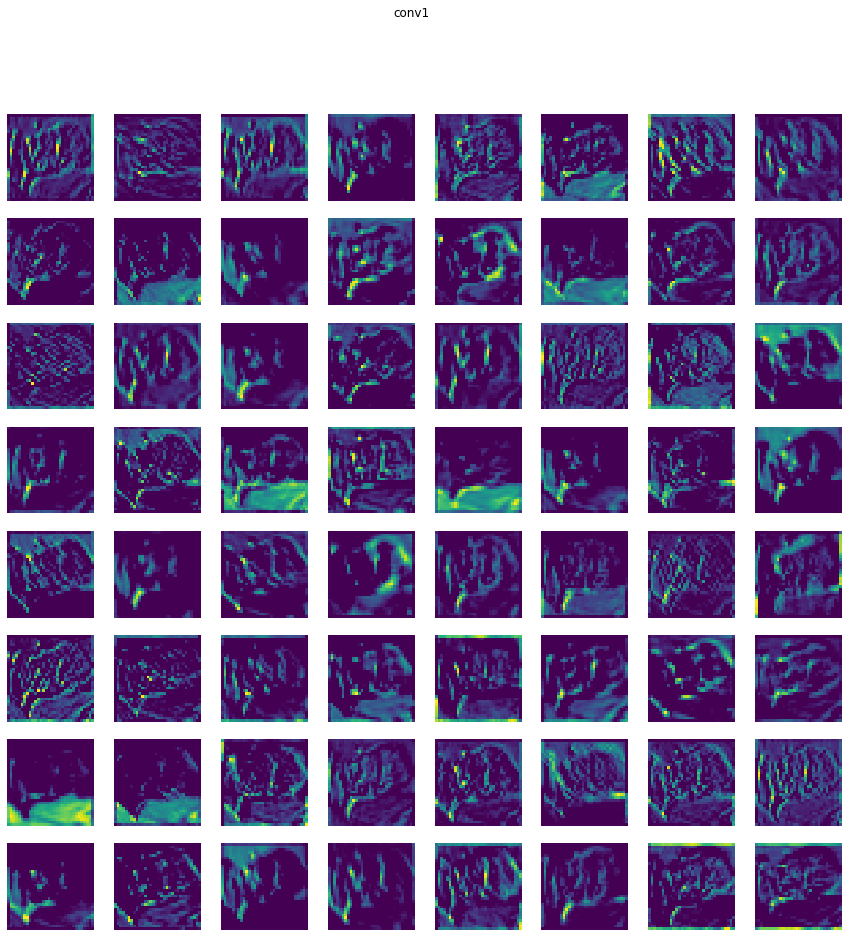

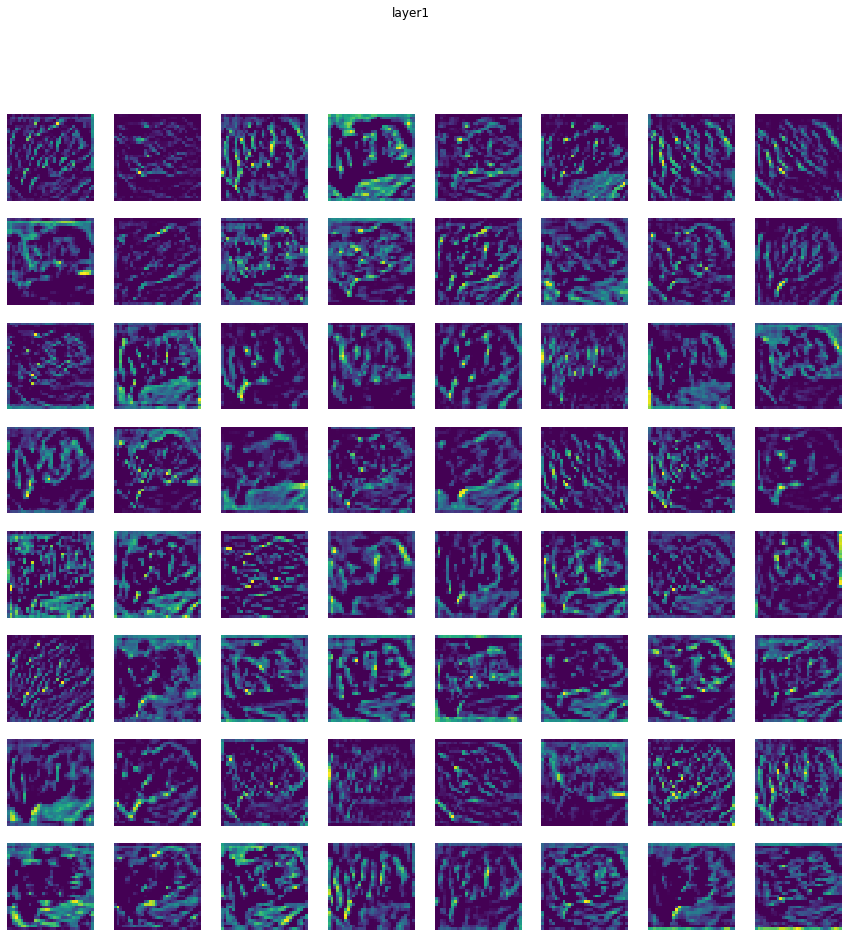

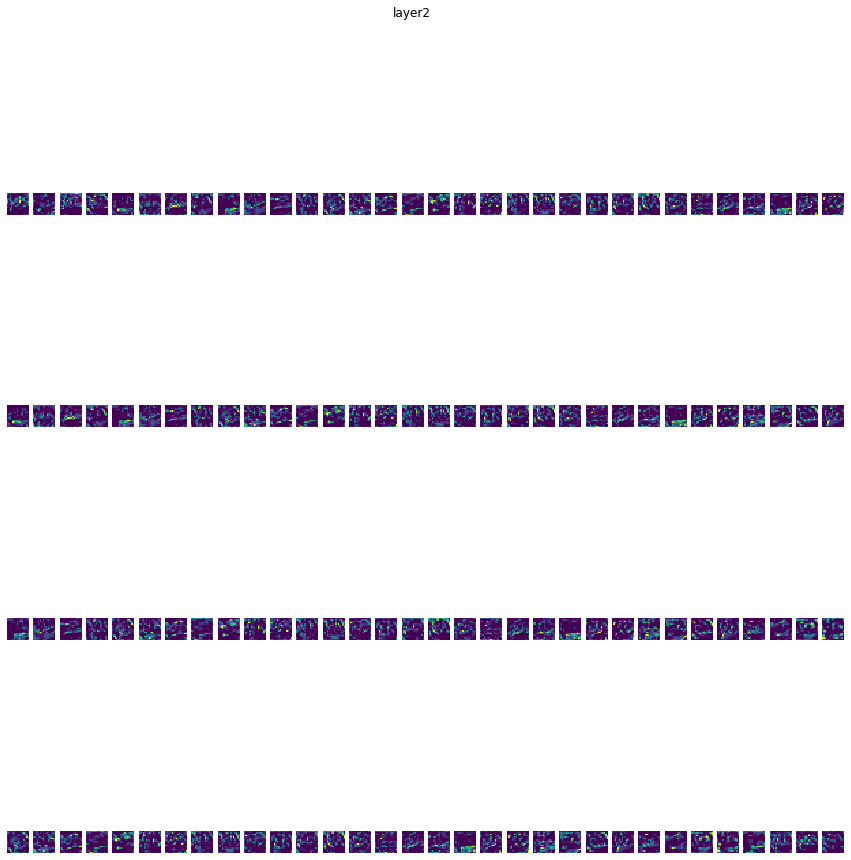

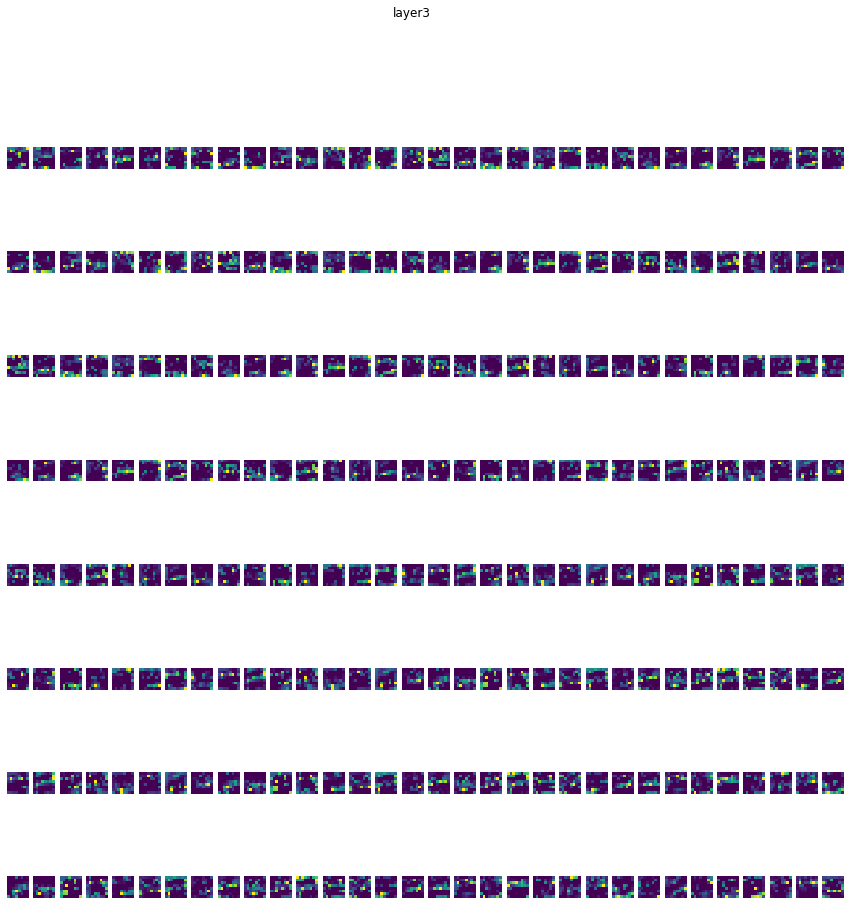

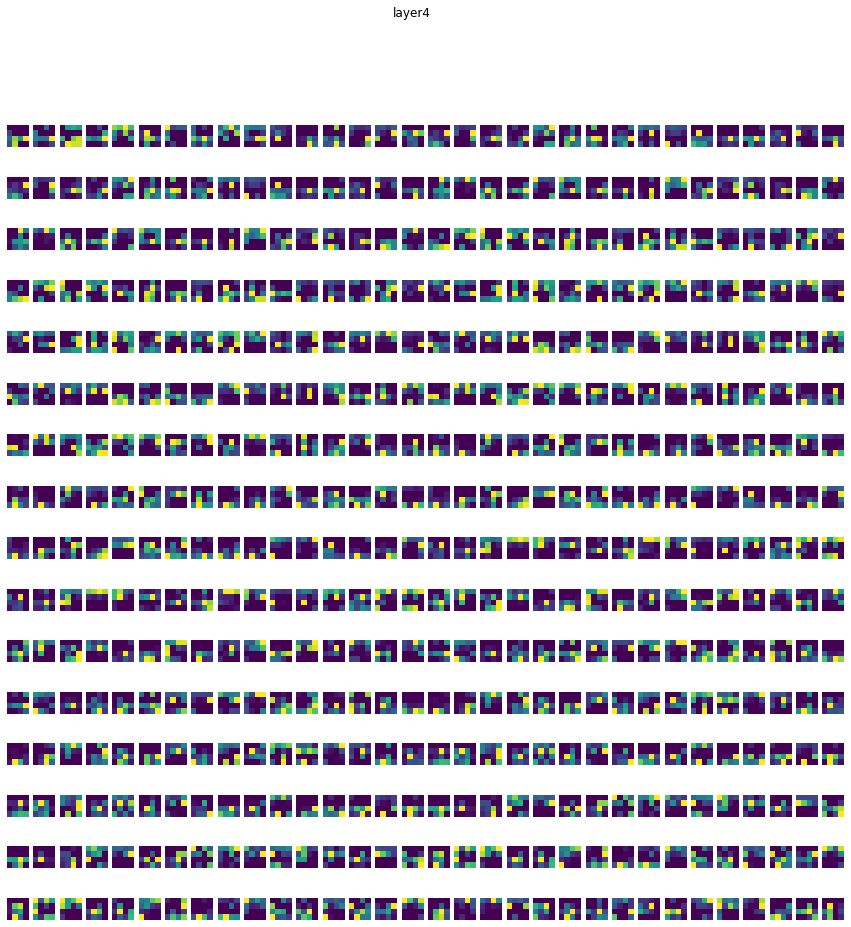

In [0]:
#!pip install matplotlib

import matplotlib.pyplot as plt

model = ResNet18()
model.load_state_dict(torch.load("./drive/My Drive/Imperial/deepml/courseworks/model/model_acc_83_04.pt"))
model.to(device)
plt.tight_layout()


activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

vis_labels = ['conv1', 'layer1', 'layer2', 'layer3', 'layer4']

for l in vis_labels:

    getattr(model, l).register_forward_hook(get_activation(l))
    
    
data, _ = test_set[0]
data = data.unsqueeze_(0).to(device = device, dtype = dtype)

output = model(data)



for idx, l in enumerate(vis_labels):

    act = activation[l].squeeze()

    if idx < 2:
        ncols = 8
    else:
        ncols = 32
        
    nrows = act.size(0) // ncols
    
    fig, axarr = plt.subplots(nrows, ncols)
    fig.set_figheight(15)
    fig.set_figwidth(15)
    fig.suptitle(l)


    for i in range(nrows):
        for j in range(ncols):
            axarr[i, j].imshow(act[i * nrows + j].cpu())
            axarr[i, j].axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


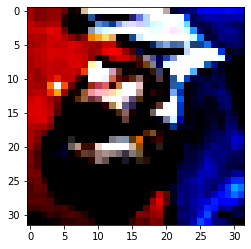

In [0]:
data, _ = test_set[0]
data = data.unsqueeze_(0).to(dtype = dtype)[0]

plt.imshow(data.transpose(0,2))

1: Regarding the low layer feature maps, we can say that the network is actually detecting edges, corner and blobs of the image. The low layer hence detect details of the image, and extract low-level features

High-level layers on the opposite seem to detect information about the overall image, the gist of the image. The features map show less details.

2: According to the evaluation, my model has a 83_04% of accuracy. I think the ResNet architecture can do a lot better. The limiting factor here is that we are only allowed to do 10 epochs. The model is underfitting, explaining why we have a "low" accuracy. Doing data augmentation and hyper parameter optimization is not changing the accuracy because we are limiting the capacity of the model to learn

3: We could use other metrics to check the performance of my network such as the recall and F1-measure (for each class). Especially if the dataset is unbalanced. Our model could not recognize a class because of this and the accuracy do not show this possible issue.